In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

In [24]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [28]:
y_probs = model.predict_proba(X_test)[:, 1]

In [29]:

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

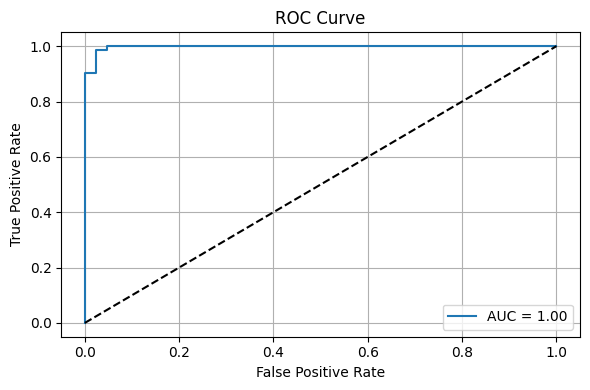

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("roc_curve.png")
plt.close()
plt.show()

In [31]:
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)


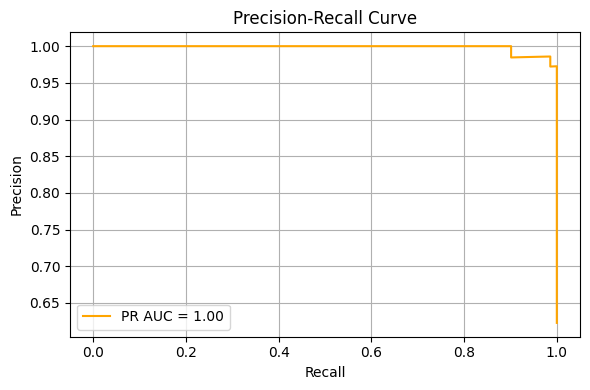

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}", color='orange')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("precision_recall_curve.png")
plt.close()
plt.show()

In [33]:

print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Precision-Recall AUC Score: {pr_auc:.4f}")
print("\nNote: For imbalanced datasets, Precision-Recall AUC can provide more insight into model performance.")


ROC AUC Score: 0.9974
Precision-Recall AUC Score: 0.9984

Note: For imbalanced datasets, Precision-Recall AUC can provide more insight into model performance.
